In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

# Titanic dataset
We will be using the Titanic dataset in trying to predict weather a person survived or not based on a number of factors.

First we need to remove the columns which are not necessary for our model, such as: `PassengerId, Name, SibSp, Parch, Ticket, Cabin, Embarked`. None of the information in these columns determines a persons chances of survival. So we will drop these columns.

In [2]:
df = pd.read_csv(r"data\9_ex.csv")
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


We can see that the dataset has 891 rows.

In [3]:
df.shape

(891, 5)

# Visualizing data

The scatterplot below shows which passengers survived or not.

The x axis represents `Age`, the colors represent `Sex` and the size of the bubbles represent the `Fare` they paid.

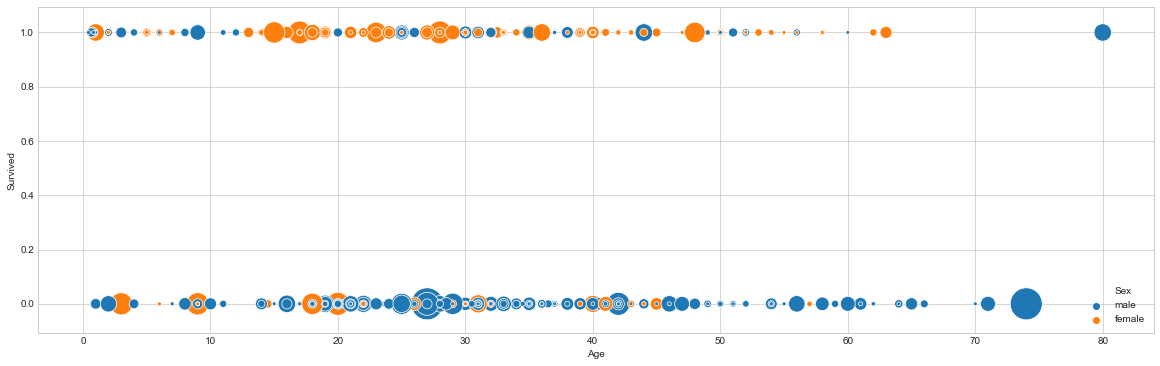

In [4]:
style.use("seaborn-whitegrid")
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Age', y='Survived', s=df['Fare']*2, hue='Sex')

# Missing values

In [5]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

For now we will fill the missing `age`(s) with the __mean age__

In [6]:
df['Age'].fillna(np.round(df['Age'].mean(), 2), inplace=True)

# Preparing data for training

### Feature / Independent variable
We will use these variables to predict weather a person survived or died.

In [7]:
X = df.drop('Survived', axis='columns')
X.tail()

,Pclass,Sex,Age,Fare
886,2,male,27.0,13.00
887,1,female,19.0,30.00
888,3,female,29.7,23.45
889,1,male,26.0,30.00
890,3,male,32.0,7.75


### Label / Target / Dependent variable
This is a variable we are trying to predict based on our features.

In [8]:
y = df['Survived']
y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

### Encoding categoriacal variable(s)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
X['Sex'] = le.fit_transform(X['Sex'])
X.tail()

,Pclass,Sex,Age,Fare
886,2,1,27.0,13.00
887,1,0,19.0,30.00
888,3,0,29.7,23.45
889,1,1,26.0,30.00
890,3,1,32.0,7.75


# Splitting data for training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(712, 179, 712, 179)

# Modeling

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
model.score(X_test, y_test)

0.8491620111731844

# Prediction

Now that our variables are encoded, we must predict using those encoded values in that order:

`Pclass`: 1, 2, 3; `Sex`: 0 Female, 1 Male, `Age`, `Fare`.

In [19]:
model.predict([[1, 1, 23, 55]])

array([1], dtype=int64)

In [20]:
model.predict([[3, 0, 23, 18]])

array([0], dtype=int64)

# Interpretations

- The feature that is most decisive in determining survival is passenger's `Sex`. Women are more likely to survive than males.

- Passenger class `Pclass` also has a great impact, as first class and second class passengers are more likely to survive.

- `Fare` also hase a slight impact with higher Fares being associated with upper classes.

- `Age` has the last effect on survival, with almost no impact.